In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show(*image_, save_to: str = ""):
    n_col = len(image_)
    fig, axes = plt.subplots(1, n_col, figsize=(15, 7), squeeze=False)
    for idx, img in enumerate(image_):
        axes[0, idx].imshow(img, interpolation="nearest")
    fig.tight_layout()
    
    if save_to:
        fig.savefig(save_to)

    fig.show()

In [3]:
def filter(
    img_hsv_: np.ndarray,
    *,
    threshold_hue_low: np.uint8 = 0,
    threshold_hue_high: np.uint8 = 180,
    threshold_saturation_low: np.uint8 = 0,
    threshold_value_low: np.uint8 = 0,
):
    copy = img_hsv_.copy()
    copy[copy[..., 0] < threshold_hue_low] = 0
    copy[copy[..., 0] > threshold_hue_high] = 0
    copy[copy[..., 1] < threshold_saturation_low] = 0
    copy[copy[..., 2] < threshold_value_low] = 0
    return copy

In [4]:
def crop(img: np.ndarray):
    mask = np.any(img > 0, axis=2)
    y, x = mask.nonzero()
    try:
        y_slc = slice(y.min(), y.max()+1)
    except ValueError:
        y_slc = slice(None)
    try:
        x_slc = slice(x.min(), x.max()+1)
    except ValueError:
        x_slc = slice(None)

    return img[y_slc, x_slc]

In [5]:
image_bgr = cv2.imread("tm_image.png")
template_bgr = cv2.imread("tm_template.png")

In [6]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template_bgr, cv2.COLOR_BGR2RGB)

In [7]:
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
template_hsv = cv2.cvtColor(template_bgr, cv2.COLOR_BGR2HSV)

print(f"{image_hsv[..., 2].min()=}")
print(f"{image_hsv[..., 2].max()=}")
print(f"{template_hsv[..., 2].min()=}")
print(f"{template_hsv[..., 2].max()=}")
print(f"{image_hsv[..., 0].min()=}")
print(f"{image_hsv[..., 0].max()=}")
print(f"{template_hsv[..., 0].min()=}")
print(f"{template_hsv[..., 0].max()=}")

image_hsv[..., 2].min()=0
image_hsv[..., 2].max()=255
template_hsv[..., 2].min()=84
template_hsv[..., 2].max()=253
image_hsv[..., 0].min()=0
image_hsv[..., 0].max()=179
template_hsv[..., 0].min()=27
template_hsv[..., 0].max()=144


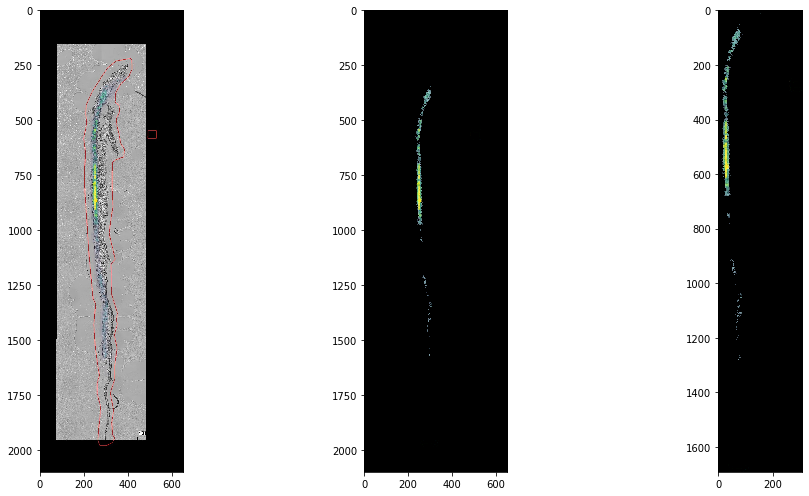

In [8]:
image_filtered = filter(
    image_hsv,
    threshold_saturation_low=60,
    threshold_hue_low=20,
    threshold_hue_high=110
)
image_filtered_rgb = cv2.cvtColor(image_filtered, cv2.COLOR_HSV2RGB)
show(image_rgb, image_filtered_rgb, crop(image_filtered_rgb), save_to="tm_filter_image_3.png")

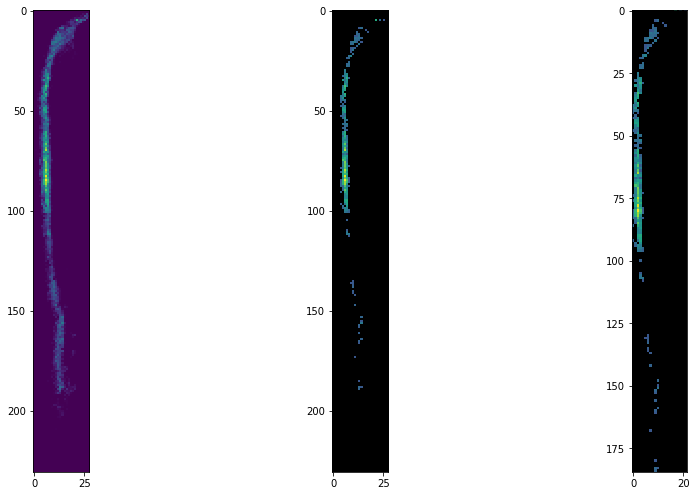

In [9]:
template_filtered = filter(
    template_hsv,
    threshold_hue_high=110
)
show(template_rgb, cv2.cvtColor(template_filtered, cv2.COLOR_HSV2RGB), crop(cv2.cvtColor(template_filtered, cv2.COLOR_HSV2RGB)))

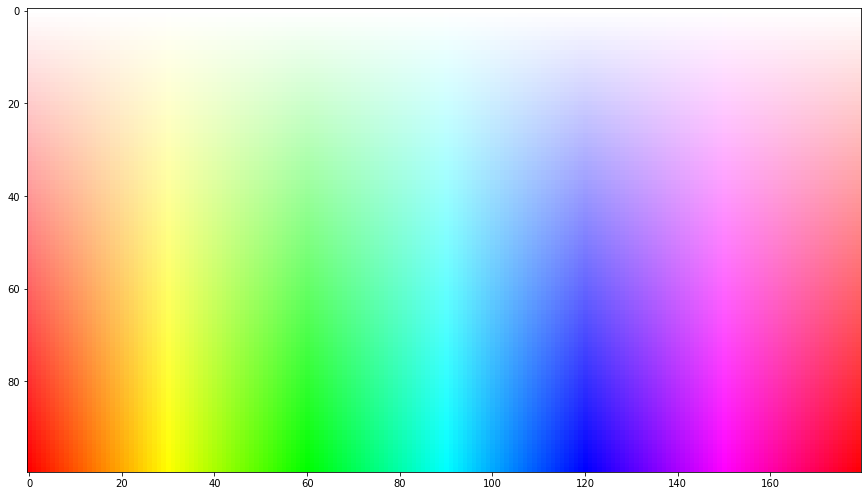

In [29]:
tmp_image = np.ndarray((100, 180, 3), dtype=np.uint8)
for i in range(tmp_image.shape[1]):
    tmp_image[:, i, 0] = i
    tmp_image[:, i, 1] = np.uint8(np.linspace(0, 255, tmp_image.shape[0]))
    tmp_image[:, i, 2] = 255
show(cv2.cvtColor(tmp_image, cv2.COLOR_HSV2RGB))

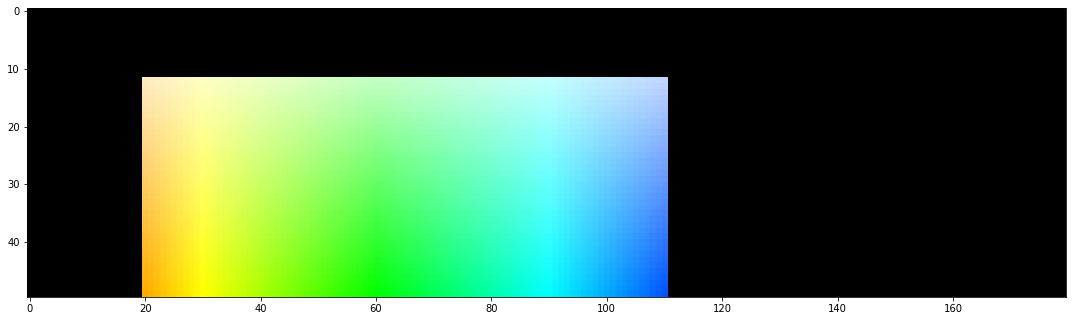

In [21]:
tmp_image = filter(
    tmp_image,
    threshold_saturation_low=60,
    threshold_hue_low=20,
    threshold_hue_high=110
)
show(cv2.cvtColor(tmp_image, cv2.COLOR_HSV2RGB))